In [12]:
# ----------------------------------------------------------------------
# Created: 2020-07-23
# Last-Updated: 
# Filename: hypothesis_testing.ipynb
# Author: Yinan Yu
# Description:  
# If you have any questions or comments, email yinan@chalmers.se or 
# yinan.yu@asymptotic.ai
# Note: the content of this file is subject to change
# ----------------------------------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import os
plt.style.use('seaborn-darkgrid')

fig_dir = "./"
data_dir = "../data/"

# Hypothesis testing

## Test statistics

In [13]:
from statsmodels.stats import contingency_tables

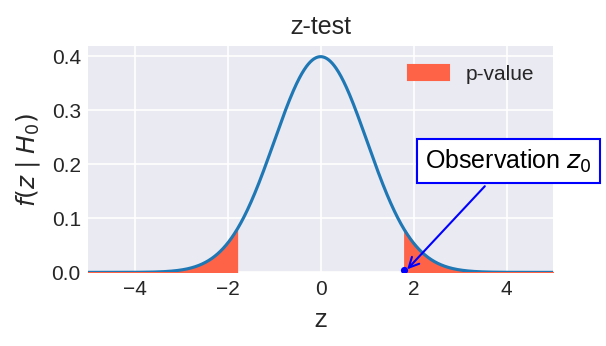

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2), dpi=150) 
xmin = -5
xmax = 5
x = np.linspace(-5, 5, num=1000)
pdf = stats.norm.pdf(x, 0, 1)

q0 = -1.8
q1 = -q0
ax.fill_between(x[(x<=q0)], 
                    pdf[(x<=q0)], 
                    color="tomato", alpha=1, 
                label="p-value")
ax.fill_between(x[(x>=q1)], 
                    pdf[(x>=q1)], 
                    color="tomato", alpha=1)

ax.plot(x, pdf)
ax.scatter(q1, 0.005, s=6, c="blue")
ax.annotate("Observation $z_0$", (q1, 0), 
            xytext=(10, 50), 
            textcoords="offset points", 
            color="k",
            arrowprops={"arrowstyle":"->", "color":"blue"}, 
                 fontsize=12, 
            bbox=dict(edgecolor="blue", facecolor="white"))
ax.set_title("z-test", fontsize=12)
ax.set_xlabel("z", fontsize=12)
ax.set_xlim(xmin, xmax)
ax.set_ylabel(r"$f(z\mid H_0)$", fontsize=12)
ax.legend()
ax.set_ylim(0);

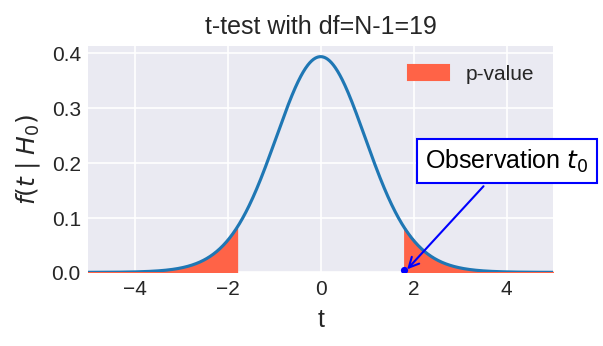

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2), dpi=150) 
xmin = -5
xmax = 5
x = np.linspace(-5, 5, num=1000)


N = 20
pdf = stats.t.pdf(x, N-1)
q0 = -1.8
q1 = -q0
ax.fill_between(x[(x<=q0)], 
                pdf[(x<=q0)], 
                color="tomato", alpha=1, 
                label="p-value")
ax.fill_between(x[(x>=q1)], 
                pdf[(x>=q1)], 
                color="tomato", alpha=1)

ax.plot(x, pdf)
ax.scatter(q1, 0.005, s=6, c="blue")
ax.annotate("Observation $t_0$", (q1, 0), 
            xytext=(10, 50), 
            textcoords="offset points", 
            color="k",
            arrowprops={"arrowstyle":"->", "color":"blue"}, 
                 fontsize=12, 
            bbox=dict(edgecolor="blue", facecolor="white"))
ax.set_title("t-test with df=N-1=%i"%(N-1), fontsize=12)
ax.set_xlabel("t", fontsize=12)
ax.set_xlim(xmin, xmax)
ax.set_ylabel(r"$f(t\mid H_0)$", fontsize=12)
ax.legend()
ax.set_ylim(0);

N, p 50 0.1
p-value from stats.binom_test: 0.2502939059533075
Our exact binom test: 0.2502939059533075
Our approximate binom test 0.17288929307558015


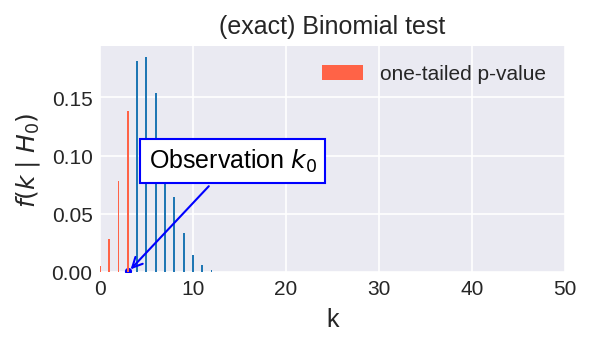

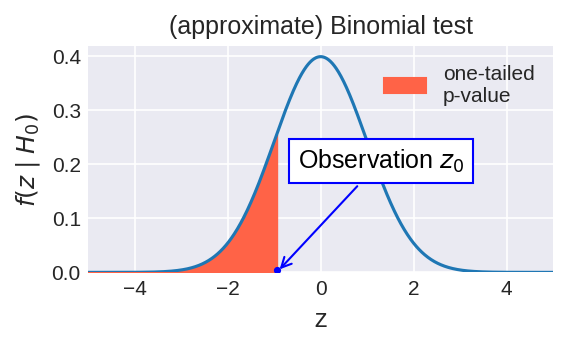

In [16]:
# Binomial test
fig, ax = plt.subplots(1, 1, figsize=(4, 2), dpi=150) 
s = 3 # left 
# s = 8 # right
n = 50
p = 0.1

x = np.asarray(list(range(0, n+1)))
pmf = stats.binom.pmf(x, n, p)
ax.bar(x, pmf, width=.2)
ax.set_xlim(0, n)

if s < n*p:
    pvalue = stats.binom.cdf(s, n=n, p=p)
    pvalue_stats = stats.binom_test(s, n=n, p=p, alternative="less")
    pmf_test_statistic = pmf[x<=s]
    x_test_statistic = x[x<=s]
    ax.bar(x_test_statistic, pmf_test_statistic, width=.2, color="tomato", label="one-tailed p-value")

    ax.annotate("Observation $k_0$", (s, 0), 
                xytext=(10, 50), 
                textcoords="offset points", 
                color="k",
                arrowprops={"arrowstyle":"->", "color":"blue"}, 
                     fontsize=12, 
                bbox=dict(edgecolor="blue", facecolor="white"))
    ax.scatter(s, 0.001, s=6, c="blue")
else:    
    pvalue = (1 - stats.binom.cdf(s, n=n, p=p) + stats.binom.pmf(s, n=n, p=p))
    pvalue_stats = stats.binom_test(s, n=n, p=p, alternative="greater")
    pmf_test_statistic = pmf[x>=s]
    x_test_statistic = x[x>=s]
    ax.bar(x_test_statistic, pmf_test_statistic, width=.2, color="tomato", label="one-tailed p-value")

    ax.annotate("Observation $k_0$", (s, 0), 
                xytext=(10, 50), 
                textcoords="offset points", 
                color="k",
                arrowprops={"arrowstyle":"->", "color":"blue"}, 
                fontsize=12, 
                bbox=dict(edgecolor="blue", facecolor="white"))
    ax.scatter(s, 0.001, s=6, c="blue") 
ax.set_title("(exact) Binomial test", fontsize=12)
ax.set_xlabel("k", fontsize=12)
ax.set_ylabel(r"$f(k\mid H_0)$", fontsize=12)    
ax.legend()

fig, ax = plt.subplots(1, 1, figsize=(4, 2), dpi=150) 
xmin = -5
xmax = 5
x = np.linspace(-5, 5, num=1000)
pdf = stats.norm.pdf(x, 0, 1)

if s < p*n:
    q0 = (s-p*n)/(math.sqrt(p*n*(1-p)))
    q1 = -q0    
    ax.fill_between(x[(x<=q0)], 
                    pdf[(x<=q0)], 
                    color="tomato", alpha=1, 
                    label="one-tailed\np-value")
    ax.annotate("Observation $z_0$", (q0, 0), 
                xytext=(10, 50), 
                textcoords="offset points", 
                color="k",
                arrowprops={"arrowstyle":"->", "color":"blue"}, 
                     fontsize=12, 
                bbox=dict(edgecolor="blue", facecolor="white"))
    ax.scatter(q0, 0.005, s=6, c="blue")
else:
    q1 = (s-p*n)/(math.sqrt(p*n*(1-p)))
    q0 = -q1
    ax.fill_between(x[(x>=q1)], 
                    pdf[(x>=q1)], 
                    color="tomato", alpha=1, label="one-tailed\np-value")
    ax.annotate("Observation $z_0$", (q1, 0), 
                xytext=(10, 50), 
                textcoords="offset points", 
                color="k",
                arrowprops={"arrowstyle":"->", "color":"blue"}, 
                     fontsize=12, 
                bbox=dict(edgecolor="blue", facecolor="white"))
    ax.scatter(q1, 0.005, s=6, c="blue")
    
p_approx = stats.norm.cdf(q0, 0, 1)    



ax.plot(x, pdf)


ax.set_title("(approximate) Binomial test", fontsize=12)
ax.set_xlabel("z", fontsize=12)
ax.set_ylabel(r"$f(z\mid H_0)$", fontsize=12)
ax.set_xlim(xmin, xmax)
ax.legend(loc="upper right")
ax.set_ylim(0)

print("N, p", n, p)
print("p-value from stats.binom_test:", pvalue_stats)
print("Our exact binom test:", pvalue)
print("Our approximate binom test", p_approx) 

N, p 50 0.5
p-value from stats.binom_test: 0.4798876616983277
Our exact binom test: 0.4798876616983277


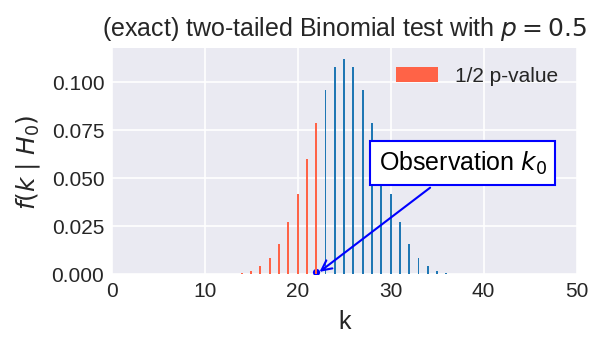

In [17]:
# Exact symmetic two-tailed binomial test
p = 0.5 # p has to be 0.5 for the null distribution to be symmetric
fig, ax = plt.subplots(1, 1, figsize=(4, 2), dpi=150) 
s = 22
n = 50

x = np.asarray(list(range(0, n+1)))
pmf = stats.binom.pmf(x, n, p)
ax.bar(x, pmf, width=.2)
ax.set_xlim(0, n)

pvalue_stats = stats.binom_test(s, n=n, p=p, alternative="two-sided")

pvalue = 2*min(stats.binom.cdf(s, n=n, p=p), 
               (1 - stats.binom.cdf(s, n=n, p=p) + stats.binom.pmf(s, n=n, p=p)))
if s < n*p:    
    pmf_test_statistic = pmf[x<=s]
    x_test_statistic = x[x<=s]
    ax.bar(x_test_statistic, pmf_test_statistic, width=.2, color="tomato", 
           label="1/2 p-value")

    ax.annotate("Observation $k_0$", (s, 0), 
                xytext=(30, 50), 
                textcoords="offset points", 
                color="k",
                arrowprops={"arrowstyle":"->", "color":"blue"}, 
                     fontsize=12, 
                bbox=dict(edgecolor="blue", facecolor="white"))
    ax.scatter(s, 0.001, s=6, c="blue")
else:    
    pmf_test_statistic = pmf[x>=s]
    x_test_statistic = x[x>=s]
    ax.bar(x_test_statistic, pmf_test_statistic, width=.2, color="tomato", 
           label="1/2 p-value")

    ax.annotate("Observation $k_0$", (s, 0), 
                xytext=(30, 50), 
                textcoords="offset points", 
                color="k",
                arrowprops={"arrowstyle":"->", "color":"blue"}, 
                fontsize=12, 
                bbox=dict(edgecolor="blue", facecolor="white"))
    ax.scatter(s, 0.001, s=6, c="blue") 
ax.set_title("(exact) two-tailed Binomial test with $p=0.5$", fontsize=12)
ax.set_xlabel("k", fontsize=12)
ax.set_ylabel(r"$f(k\mid H_0)$", fontsize=12)    
ax.legend()

print("N, p", n, p)
print("p-value from stats.binom_test:", pvalue_stats)
print("Our exact binom test:", pvalue)

-- Our exact binomial test:
 pvalue      0.006347656250000001
statistic   1
-- Mcnemar's exact test using statsmodels.stats:
 pvalue      0.006347656250000001
statistic   1.0


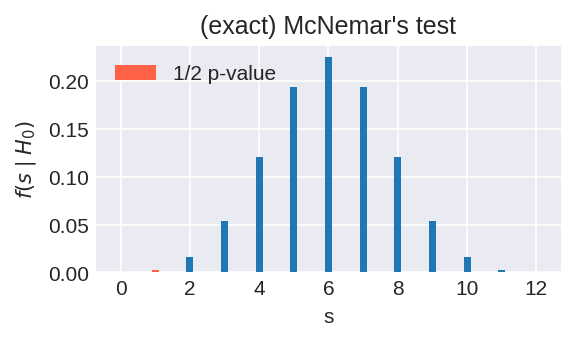

In [18]:
# McNemar's test for small n10 or n01

n10 = 11
n01 = 1
n00 = 90
n11 = 102
N = n10 + n01
table = [[n00, n10], [n01, n11]]

s = min(n10, n01)
p = 2*stats.binom.cdf(s, N, 0.5)
print("-- Our exact binomial test:")
print(" pvalue     ", p)
print("statistic  ", s)
mcnemar_result = contingency_tables.mcnemar(table, exact=True, correction=True)
print("-- Mcnemar's exact test using statsmodels.stats:\n", mcnemar_result)

fig, ax = plt.subplots(1, 1, figsize=(4, 2), dpi=150) 
xmin = 0
xmax = 15
x = list(range(0, N+1))
pmf = stats.binom.pmf(x, N, 0.5)
ax.bar(x, pmf, width=.2)

x = np.asarray(x)
pmf_test_statistic = pmf[x<=s]
x_test_statistic = x[x<=s]
ax.bar(x_test_statistic, pmf_test_statistic, width=.2, color="tomato", label="1/2 p-value")

ax.legend(loc="upper left")
ax.set_xlabel("s")
ax.set_ylabel(r"$f(s\mid H_0)$")
ax.set_title("(exact) McNemar's test");

229
-- Our approximate McNemar's test:
 pvalue      0.32393984559853417
statistic   0.972972972972973
-- Mcnemar's test using statsmodels.stats:
 pvalue      0.32393984559853134
statistic   0.972972972972973
-- Our exact binomial test:
 pvalue      0.3240086000878365
statistic   15
-- Exact Mcnemar's test using statsmodels.stats:
 pvalue      0.3240086000878365
statistic   15.0


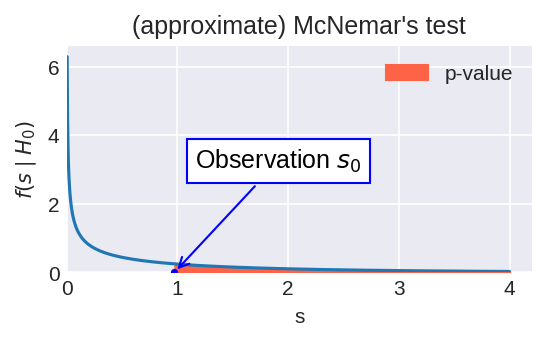

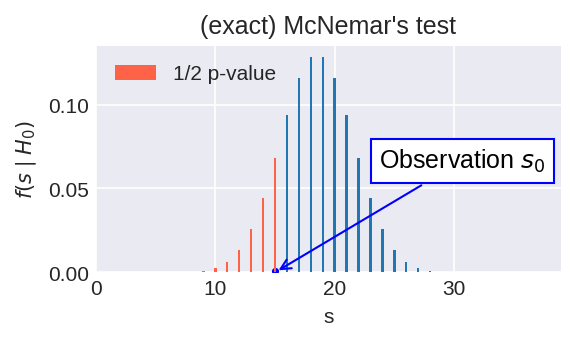

In [19]:
# McNemar's test for large n10 and n01

n01 = 22
n10 = 15
n00 = 90
n11 = 102
table_large = [[n00, n10], [n01, n11]]
N = n01 + n10
print(n01+n10+n00+n11)
s = np.power(abs(n10-n01)-1, 2)/(N)
p = 1-stats.chi2.cdf(s, df=1)
print("-- Our approximate McNemar's test:")
print(" pvalue     ", p)
print("statistic  ", s)

mcnemar_approx = contingency_tables.mcnemar(table=table_large, 
                                            exact=False)
print("-- Mcnemar's test using statsmodels.stats:\n", mcnemar_approx)

fig, ax = plt.subplots(1, 1, figsize=(4, 2), dpi=150) 
xmin = 0
xmax = 4
x = np.linspace(xmin, xmax, 1000)
pdf_chi2 = stats.chi2.pdf(x, df=1)
ax.plot(x, pdf_chi2)
ax.scatter(s, 0.005, s=6, c="blue", zorder=2)
ax.annotate("Observation $s_0$", (s, 0), 
            xytext=(10, 50), 
            textcoords="offset points", 
            color="k",
            arrowprops={"arrowstyle":"->", "color":"blue"}, 
                 fontsize=12, 
            bbox=dict(edgecolor="blue", facecolor="white"))
ax.fill_between(x[x>=s], pdf_chi2[x>=s], 
                color="tomato", label="p-value", zorder=1)
ax.set_xlim(0)
ax.set_ylim(0)
ax.set_xlabel("s")
ax.set_ylabel(r"$f(s\mid H_0)$")
ax.set_title("(approximate) McNemar's test")
ax.legend()

fig, ax = plt.subplots(1, 1, figsize=(4, 2), dpi=150) 
xmin = 0
xmax = 15
x = list(range(0, N+1))
pmf = stats.binom.pmf(x, N, 0.5)
ax.bar(x, pmf, width=.2)

s = min(n10, n01)
p = 2*stats.binom.cdf(s, N, 0.5)
print("-- Our exact binomial test:")
print(" pvalue     ", p)
print("statistic  ", s)
mcnemar_exact = contingency_tables.mcnemar(table_large, 
                                           exact=True, 
                                           correction=True)
print("-- Exact Mcnemar's test using statsmodels.stats:\n", 
      mcnemar_exact)

s_exact = min(n10, n01)
x = np.asarray(x)
pmf_test_statistic = pmf[x<=s_exact]
x_test_statistic = x[x<=s_exact]
ax.bar(x_test_statistic, 
       pmf_test_statistic, 
       width=.2, 
       color="tomato", 
       label="1/2 p-value")
ax.scatter(s_exact, 0.001, s=6, c="blue")
ax.annotate("Observation $s_0$", (s_exact, 0), 
            xytext=(50, 50), 
            textcoords="offset points", 
            color="k",
            arrowprops={"arrowstyle":"->", "color":"blue"}, 
                 fontsize=12, 
            bbox=dict(edgecolor="blue", facecolor="white"))
ax.legend(loc="upper left")
ax.set_title("(exact) McNemar's test")
ax.set_xlim(0)
ax.set_ylim(0)
ax.set_xlabel("s")
ax.set_ylabel(r"$f(s\mid H_0)$");

In [20]:
N = 40
x = stats.norm.rvs(loc=5.2, scale=1.2, size=N, random_state=1)
mu = 4.5
s = np.sqrt(1/(N-1)*sum((x-x.mean())**2))
print(x)
print("estimated standard deviation:", s)
print("sample mean:", x.mean())
t0=(x.mean()-mu)/(s/np.sqrt(N))
print("test statistic t0:", t0)
p = 2*(1-stats.t.cdf(t0, df=N-1))
print("p-value:", p)
stats.ttest_1samp(x, mu)

[7.14921444 4.4658923  4.5661939  3.91243765 6.23848916 2.43815356
 7.29377412 4.28655172 5.58284692 4.90075555 6.95452952 2.72783115
 4.81309936 4.73913477 6.56052333 3.88013048 4.99308615 4.1465699
 5.2506565  5.89937826 3.87925699 6.57366845 6.28190886 5.80299321
 6.28102714 4.37952657 5.05253173 4.07707668 4.8785343  5.83642656
 4.3700071  4.72389577 4.37539276 4.18575323 4.39450464 5.18480248
 3.85922758 5.48129884 7.19176261 6.09045299]
estimated standard deviation: 1.1722645560477896
sample mean: 5.09248243051735
test statistic t0: 3.1965377514849984
p-value: 0.0027568944063467438


Ttest_1sampResult(statistic=3.1965377514849975, pvalue=0.0027568944063466306)

In [21]:
N_X = 40
N_Y = 50
x = stats.norm.rvs(loc=5.2, scale=1.2, size=N_X, random_state=1)
y = stats.norm.rvs(loc=4.5, scale=0.9, size=N_Y, random_state=2)
s_X = np.sqrt(1/(N_X-1)*sum((x-x.mean())**2))
s_Y = np.sqrt(1/(N_Y-1)*sum((y-y.mean())**2))
_s_X = s_X**2/N_X
_s_Y = s_Y**2/N_Y
df = (_s_X+_s_Y)**2/(_s_X**2/(N_X-1)+(_s_Y**2/(N_Y-1)))
t0=(x.mean()-y.mean())/(np.sqrt(_s_X+_s_Y))
p = 2*min(1-stats.t.cdf(t0, df=df), stats.t.cdf(t0, df=df))
print("means:", x.mean(), y.mean())
print("s:", s_X, s_Y)
print("test statistic t0", t0)
print("p-value:", p)
stats.ttest_ind(x, y, equal_var=False)

means: 5.09248243051735 4.37423042472877
s: 1.1722645560477896 0.9461044815740614
test statistic t0 3.14197726050423
p-value: 0.0024113114471826513


Ttest_indResult(statistic=3.14197726050423, pvalue=0.002411311447182524)

In [22]:
N = 40
x = stats.norm.rvs(loc=5.2, scale=1.2, size=N, random_state=1)
z = stats.norm.rvs(loc=4.5, scale=0.9, size=N, random_state=0)
diff = x-z
s = np.sqrt(1/(N-1)*sum((diff-diff.mean())**2))

print("estimated standard deviation:", s)
print("sample mean:", diff.mean())
t0=(diff.mean())/(s/np.sqrt(N))
print("test statistic t0:", t0)
p = 2*(1-stats.t.cdf(t0, df=N-1))
print("p-value:", p)
stats.ttest_rel(x, z)

estimated standard deviation: 1.313365474169452
sample mean: 0.31119420462279346
test statistic t0: 1.4985660893436272
p-value: 0.14203767626181762


Ttest_relResult(statistic=1.4985660893436274, pvalue=0.1420376762618175)